In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
wells = pd.read_csv('/work/Carpe-Datum-2022/Well_Head_and_Completion.csv')
wm = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AI.csv')
wells = wells.merge(wm, how='left', left_on='WELL', right_on='well_id',).drop_duplicates('WELL')
new = pd.read_csv('new_df2.csv')
wells = wells.merge(new, how='left', left_on='WELL', right_on='Unnamed: 0', suffixes=(None,'_y'))
wells['line'] = -.29*wells['Y(ft)']+154670
time = pd.read_csv('/work/Carpe-Datum-2022/Production_History_Field.csv')
z = pd.DataFrame()
z['Start Date'] = time['Date'].iloc[time.drop('Date',axis=1).ne(0).idxmax()]
z['Well'] = time.drop('Date', axis=1).columns
z['Well'] = z['Well'].str.replace('WOPR:','').str.replace('\(bbl/day\)','')
z['Age'] = (pd.to_datetime('today') - pd.to_datetime(z['Start Date'])).dt.days
wells = wells.merge(z, how='left', left_on='WELL', right_on='Well')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
wells

,WELL,X(ft),Y(ft),Completion,Elevation Kelly Bushing (ft),Unnamed: 0,MD(ft),PORO(v/v),Permeability(mD),RHOB(g/cm3),...,Unnamed: 0_y,X(ft)_y,Y(ft)_y,Completion_y,Elevation Kelly Bushing (ft)_y,Sum_Production,line,Start Date,Well,Age
0,WP0,137106.82,83818.47,Upper,193.32,169,4597.471739,NaN,NaN,2.700700,...,WP0,137106.82,83818.47,Upper,193.32,475.695080,130362.6437,1-Jan-12,WP0,3737
1,WP1,132460.98,85832.77,Upper,187.15,473,4731.140545,NaN,NaN,2.564248,...,WP1,132460.98,85832.77,Upper,187.15,1005.566662,129778.4967,1-Nov-16,WP1,1971
2,WP2,133634.00,82144.52,Upper,164.55,1228,4687.021905,0.068448,0.010060,2.574827,...,WP2,133634.00,82144.52,Upper,164.55,443.228898,130848.0892,1-Feb-15,WP2,2610
3,WP3,140892.57,81747.12,Lower,179.92,1875,4734.050184,0.039348,NaN,2.690694,...,WP3,140892.57,81747.12,Lower,179.92,88345.368434,130963.3352,1-Dec-13,WP3,3037
4,WP4,109951.43,89343.45,Lower,186.21,1920,4372.429384,NaN,NaN,2.730268,...,WP4,109951.43,89343.45,Lower,186.21,8484.746653,128760.3995,1-May-19,WP4,1060
5,WP5,123950.95,92227.31,Lower,172.80,1188,4602.662001,NaN,NaN,2.465382,...,WP5,123950.95,92227.31,Lower,172.80,1056.718880,127924.0801,1-Sep-15,WP5,2398
6,WP6,111035.32,88692.32,Lower,182.66,557,4369.447677,NaN,NaN,NaN,...,WP6,111035.32,88692.32,Lower,182.66,30999.563162,128949.2272,1-Aug-19,WP6,968
7,WP7,112439.69,85560.85,Lower,181.09,145,4434.485528,0.046906,NaN,2.711619,...,WP7,112439.69,85560.85,Lower,181.09,71.108432,129857.3535,1-Feb-21,WP7,418
8,WP8,127369.74,91739.99,Upper,180.04,602,4665.319132,NaN,NaN,2.522050,...,WP8,127369.74,91739.99,Upper,180.04,654.773717,128065.4029,1-Mar-13,WP8,3312
9,WP9,115943.69,86730.44,Lower,178.25,105,4593.035411,NaN,NaN,2.528578,...,WP9,115943.69,86730.44,Lower,178.25,263.803390,129518.1724,1-May-12,WP9,3616


In [ ]:
fig1 = px.scatter(wells, x='Y(ft)', y='X(ft)', hover_name='WELL', color='Completion', width=800, height=800)
fig2 = px.line(wells, x='Y(ft)', y='line', title='Fault Line')
fig = go.Figure(data=fig1.data+fig2.data)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig1.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Carpe-Datum-2022/AI.csv'

In [ ]:
wells

,WELL,X(ft),Y(ft),Completion,Elevation Kelly Bushing (ft),Unnamed: 0,MD(ft),PORO(v/v),Permeability(mD),RHOB(g/cm3),...,Unnamed: 0_y,X(ft)_y,Y(ft)_y,Completion_y,Elevation Kelly Bushing (ft)_y,Sum_Production,line,Start Date,Well,Age
0,WP0,137106.82,83818.47,Upper,193.32,169,4597.471739,NaN,NaN,2.700700,...,WP0,137106.82,83818.47,Upper,193.32,475.695080,130362.6437,1-Jan-12,WP0,3737
1,WP1,132460.98,85832.77,Upper,187.15,473,4731.140545,NaN,NaN,2.564248,...,WP1,132460.98,85832.77,Upper,187.15,1005.566662,129778.4967,1-Nov-16,WP1,1971
2,WP2,133634.00,82144.52,Upper,164.55,1228,4687.021905,0.068448,0.010060,2.574827,...,WP2,133634.00,82144.52,Upper,164.55,443.228898,130848.0892,1-Feb-15,WP2,2610
3,WP3,140892.57,81747.12,Lower,179.92,1875,4734.050184,0.039348,NaN,2.690694,...,WP3,140892.57,81747.12,Lower,179.92,88345.368434,130963.3352,1-Dec-13,WP3,3037
4,WP4,109951.43,89343.45,Lower,186.21,1920,4372.429384,NaN,NaN,2.730268,...,WP4,109951.43,89343.45,Lower,186.21,8484.746653,128760.3995,1-May-19,WP4,1060
5,WP5,123950.95,92227.31,Lower,172.80,1188,4602.662001,NaN,NaN,2.465382,...,WP5,123950.95,92227.31,Lower,172.80,1056.718880,127924.0801,1-Sep-15,WP5,2398
6,WP6,111035.32,88692.32,Lower,182.66,557,4369.447677,NaN,NaN,NaN,...,WP6,111035.32,88692.32,Lower,182.66,30999.563162,128949.2272,1-Aug-19,WP6,968
7,WP7,112439.69,85560.85,Lower,181.09,145,4434.485528,0.046906,NaN,2.711619,...,WP7,112439.69,85560.85,Lower,181.09,71.108432,129857.3535,1-Feb-21,WP7,418
8,WP8,127369.74,91739.99,Upper,180.04,602,4665.319132,NaN,NaN,2.522050,...,WP8,127369.74,91739.99,Upper,180.04,654.773717,128065.4029,1-Mar-13,WP8,3312
9,WP9,115943.69,86730.44,Lower,178.25,105,4593.035411,NaN,NaN,2.528578,...,WP9,115943.69,86730.44,Lower,178.25,263.803390,129518.1724,1-May-12,WP9,3616


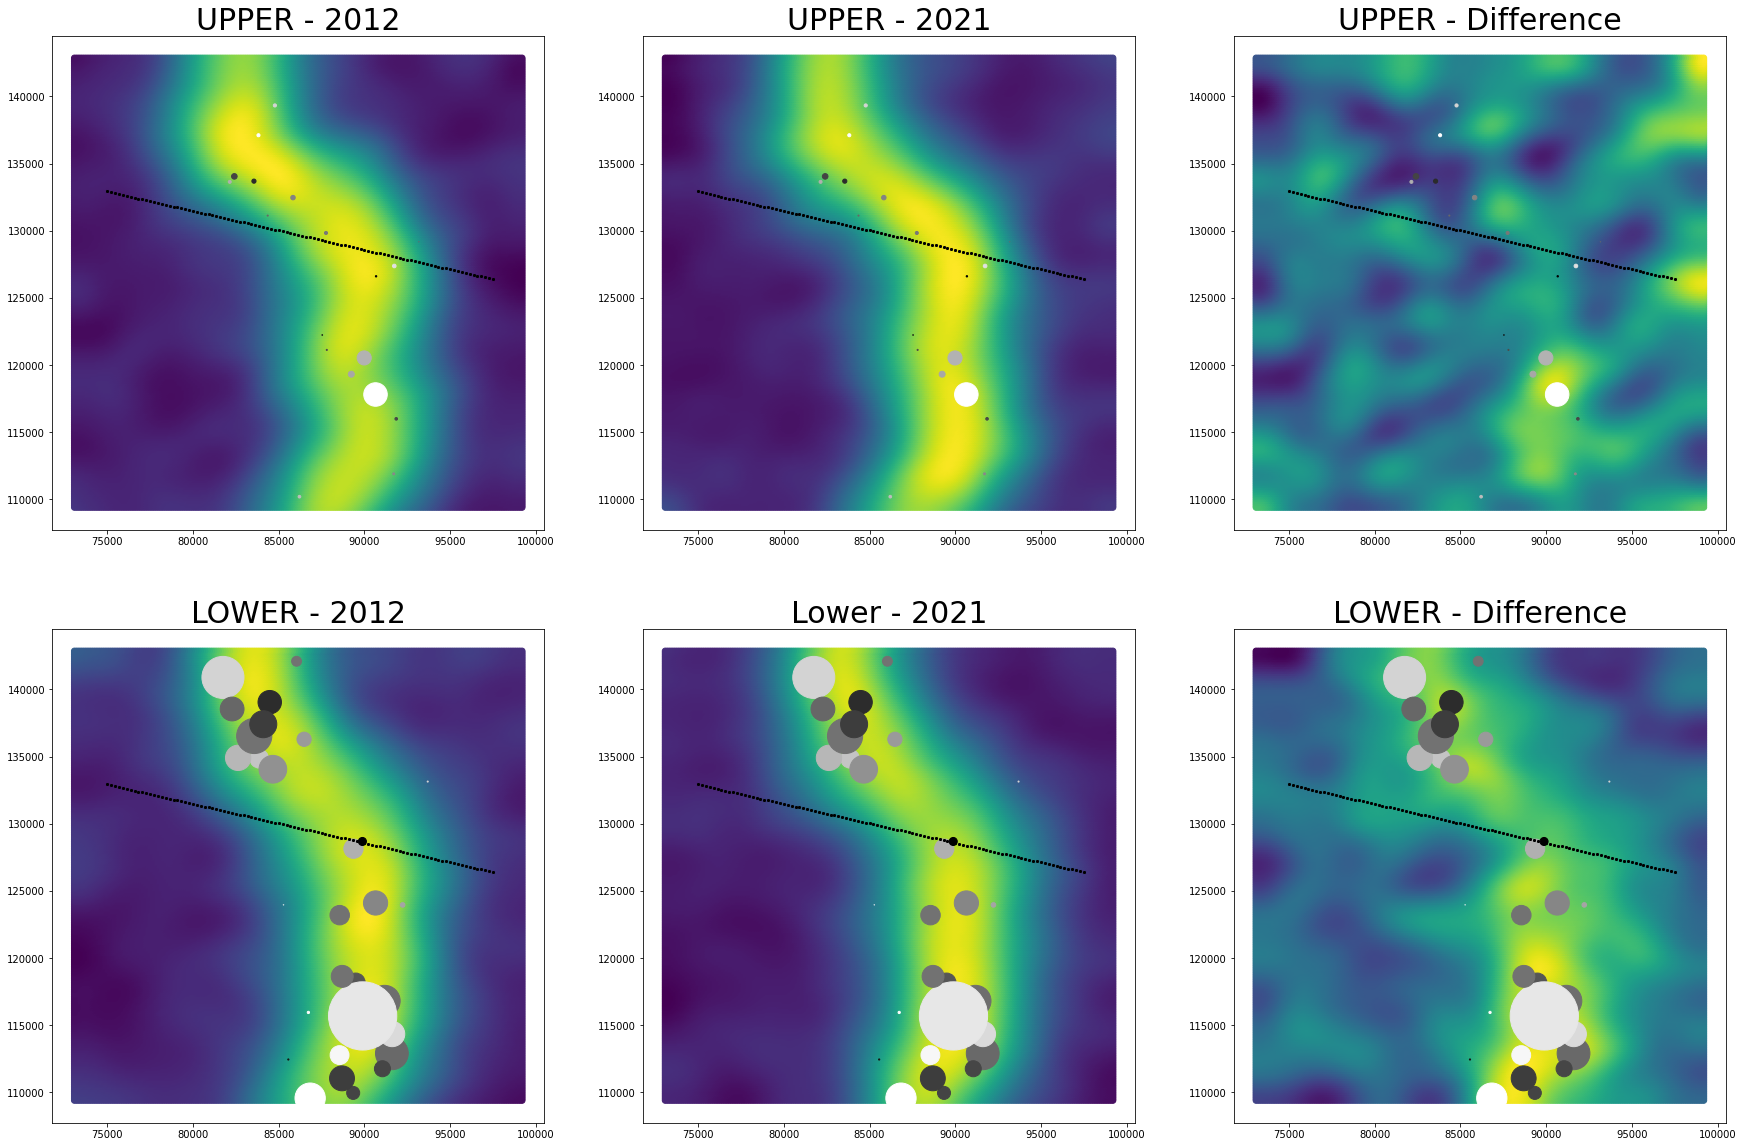

In [61]:
t = np.linspace(75000, 97500, 100)
fault = -.29*t + 154670

fig, ax = plt.subplots(2, 3, figsize=(30,20))
ai['Y(ft)'] = ai['Y']
ai['X(ft)'] = ai['X']

#ax[0][0] = plt.figure(figsize=(10,10))
ax[0][0].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_upper(2012-01-01)'], )
uppers = wells[wells['Completion'] == 'Upper']
ax[0][0].scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/50, c=uppers['Age'], cmap='gray')
ax[0][0].scatter(t, fault, s=5, c='black', marker='x', label='faultline')
ax[0][0].set_title('UPPER - 2012', fontsize=30)

#ax[1][0] = plt.figure(figsize=(10,10))
ax[1][0].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_lower(2012-01-01)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[1][0].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/50, c=lowers['Age'], cmap='gray')
ax[1][0].set_title('LOWER - 2012', fontsize=30)
ax[1][0].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

#ax[0][1] = plt.figure(figsize=(10,10))
ax[0][1].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_upper(2021-12-20)'], )
uppers = wells[wells['Completion'] == 'Upper']
ax[0][1].scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/50, c=uppers['Age'], cmap='gray')
ax[0][1].set_title('UPPER - 2021', fontsize=30)
ax[0][1].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

#ax[1][1] = plt.figure(figsize=(10,10))
ax[1][1].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_lower(2021-12-20)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[1][1].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/50, c=lowers['Age'], cmap='gray')
ax[1][1].set_title('Lower - 2021', fontsize=30)
ax[1][1].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

#ax[0][2] = plt.figure(figsize=(10,10))
ax[1][2].scatter(ai['Y(ft)'], ai['X(ft)'], c= -ai['AI_lower(2012-01-01)'] + ai['AI_lower(2021-12-20)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[1][2].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/50, c=lowers['Age'], cmap='gray')
ax[1][2].set_title('LOWER - Difference', fontsize=30)
ax[1][2].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

#ax[1][2] = plt.figure(figsize=(10,10))
ax[0][2].scatter(ai['Y(ft)'], ai['X(ft)'], c=-ai['AI_upper(2012-01-01)'] + ai['AI_upper(2021-12-20)'], )
uppers = wells[wells['Completion'] == 'Upper']
ax[0][2].scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/50, c=uppers['Age'], cmap='gray')
ax[0][2].set_title('UPPER - Difference', fontsize=30)
ax[0][2].scatter(t, fault, s=5, c='black', marker='x', label='faultline')
# validate using existing wells
plt.show()

In [ ]:
keep = wm[wm['PORO(v/v)'].notna()]
np.corrcoef(keep['AI_upper(2012-01-01)'], keep['PORO(v/v)'])

array([[1.        , 0.25983493],
       [0.25983493, 1.        ]])

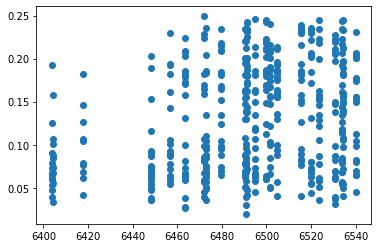

In [ ]:
plt.scatter(keep['AI_upper(2012-01-01)'], keep['PORO(v/v)'])

In [ ]:
for well in wm['well_id'].unique():
    w = wells[wells['WELL'] == well]
    x = w['X(ft)'].iloc[0]
    y = w['Y(ft)'].iloc[0]
    min_dist = 9999999999
    min_loc = 0
    for i, pt in enumerate(ai.iterrows()):
        dist = np.linalg.norm(np.array([x,y]) - np.array([pt[1]['X(ft)'], pt[1]['Y(ft)']]))
        if dist < min_dist:
            min_loc = i
            min_dist = dist

    wells.loc[wells['WELL']==well, 'AI_lower(2012-01-01)'] = ai.iloc[min_loc]['AI_lower(2012-01-01)']
    wells.loc[wells['WELL']==well, 'AI_lower(2021-12-20)'] = ai.iloc[min_loc]['AI_lower(2021-12-20)']
    wells.loc[wells['WELL']==well, 'AI_upper(2012-01-01)'] = ai.iloc[min_loc]['AI_upper(2012-01-01)']
    wells.loc[wells['WELL']==well, 'AI_upper(2021-12-20)'] = ai.iloc[min_loc]['AI_upper(2021-12-20)']
    wells.loc[wells['WELL']==well, 'nearest AI X(ft)'] = ai.iloc[min_loc]['X(ft)']
    wells.loc[wells['WELL']==well, 'nearest AI Y(ft)'] = ai.iloc[min_loc]['Y(ft)']
    
    #ai_local = ai[(ai['X(ft)'] == x) & (ai['Y(ft)'] == y)]

    #print(ai_local)

In [ ]:
wells

,WELL,X(ft),Y(ft),Completion,Elevation Kelly Bushing (ft),line,AI_lower(2012-01-01),AI_lower(2021-12-20),AI_upper(2012-01-01),AI_upper(2021-12-20),nearest AI X(ft),nearest AI Y(ft)
0,WP0,137106.82,83818.47,Upper,193.32,196920.4839,6557.579122,6634.826845,6530.399584,6527.288321,137081.04,83843.36
1,WP1,132460.98,85832.77,Upper,187.15,187594.2749,6539.368495,6609.504274,6522.790055,6523.526063,132489.04,85811.36
2,WP2,133634.00,82144.52,Upper,164.55,204670.8724,6449.432465,6489.692810,6474.268628,6454.475167,133669.84,82137.76
3,WP3,140892.57,81747.12,Lower,179.92,206510.8344,6518.878750,6586.112456,6490.674049,6505.034668,140885.84,81744.16
4,WP4,109951.43,89343.45,Lower,186.21,171339.8265,6520.969109,6611.813169,6497.152926,6500.953741,109922.64,89353.76
5,WP5,123950.95,92227.31,Lower,172.80,157987.5547,6515.812070,6582.968019,6457.752297,6450.780934,123961.04,92240.16
6,WP6,111035.32,88692.32,Lower,182.66,174354.5584,6543.452650,6647.156891,6514.925925,6529.617078,110972.24,88697.76
7,WP7,112439.69,85560.85,Lower,181.09,188853.2645,6438.783226,6486.432395,6403.508051,6400.975613,112415.44,85548.96
8,WP8,127369.74,91739.99,Upper,180.04,160243.8463,6536.424734,6600.354460,6501.718771,6500.158650,127372.24,91715.36
9,WP9,115943.69,86730.44,Lower,178.25,183438.0628,6457.397617,6510.109098,6411.997249,6423.840537,115957.84,86729.76


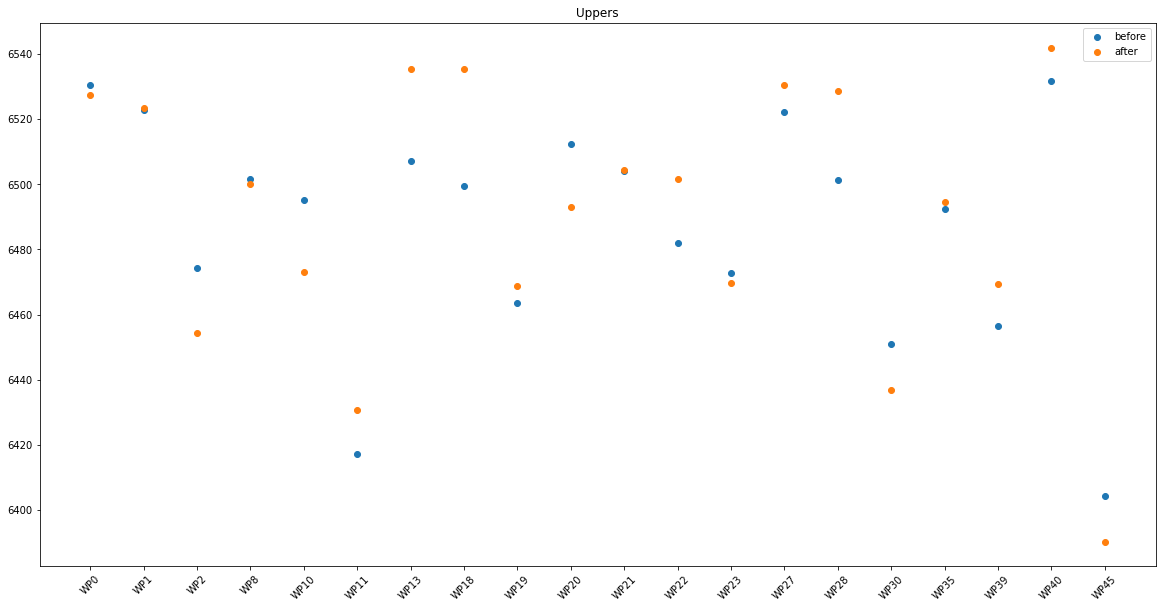

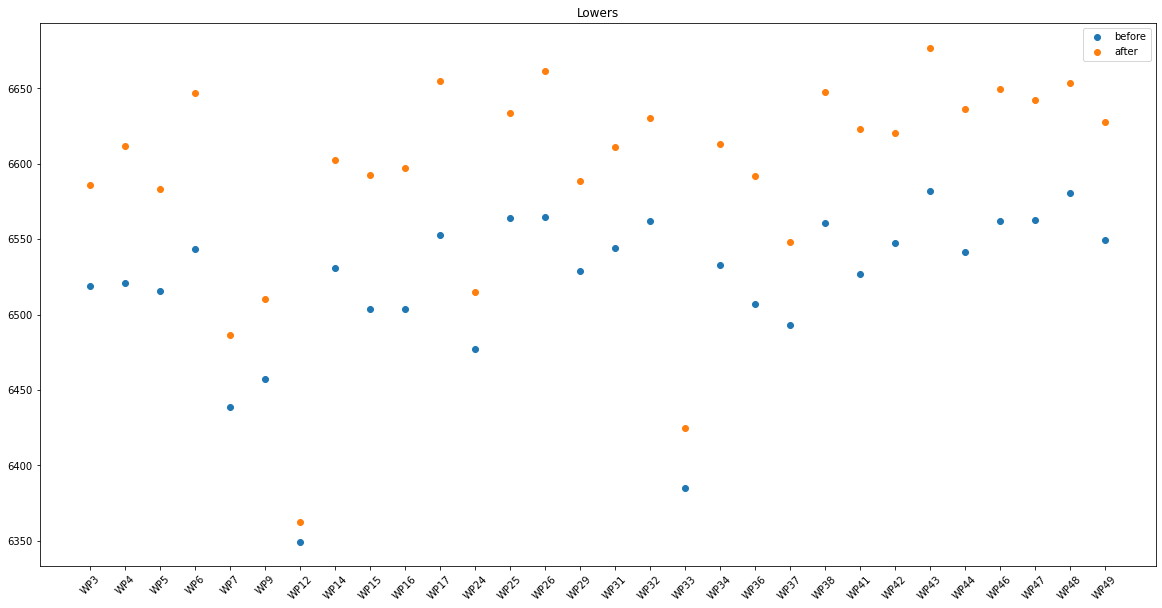

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Uppers')
u = wells[wells['Completion'] == 'Upper']
plt.scatter(u['WELL'], u['AI_upper(2012-01-01)'], label='before')
plt.scatter(u['WELL'], u['AI_upper(2021-12-20)'], label='after')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.title('Lowers')
l = wells[wells['Completion'] == 'Lower']
plt.scatter(l['WELL'], l['AI_lower(2012-01-01)'], label='before')
plt.scatter(l['WELL'], l['AI_lower(2021-12-20)'], label='after')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
for well in wm['well_id'].unique():
    wm.loc[wm['well_id']==well, 'AI_lower(2012-01-01)'] = wells.loc[wells['WELL']==well, 'AI_lower(2012-01-01)'].iloc[0]
    wm.loc[wm['well_id']==well, 'AI_lower(2021-12-20)'] = wells.loc[wells['WELL']==well, 'AI_lower(2021-12-20)'].iloc[0]
    wm.loc[wm['well_id']==well, 'AI_upper(2012-01-01)'] = wells.loc[wells['WELL']==well, 'AI_upper(2012-01-01)'].iloc[0]
    wm.loc[wm['well_id']==well, 'AI_upper(2021-12-20)'] = wells.loc[wells['WELL']==well, 'AI_upper(2021-12-20)'].iloc[0]

In [ ]:
wm.to_csv('Carpe-Datum-2022/Well_Log/WELL_MASTER_AI.csv')

In [ ]:
ai[(ai['X(ft)']==112415.44) & (ai['Y(ft)']==85548.95999999999)]

,X(ft),Y(ft),AI_lower(2012-01-01),AI_upper(2012-01-01),AI_lower(2021-12-20),AI_upper(2021-12-20)
4704,112415.44,85548.96,6438.783226,6403.508051,6486.432395,6400.975613


In [ ]:
for pt in ai.iterrows():
    print(pt[1])

AI_lower(2012-01-01)      6297.470578
AI_upper(2012-01-01)      6285.239008
AI_lower(2021-12-20)      6280.966257
AI_upper(2021-12-20)      6305.771121
Name: 796, dtype: float64
X(ft)                   109791.440000
Y(ft)                    73347.360000
AI_lower(2012-01-01)      6297.830303
AI_upper(2012-01-01)      6286.163096
AI_lower(2021-12-20)      6281.432762
AI_upper(2021-12-20)      6307.373057
Name: 797, dtype: float64
X(ft)                   109791.440000
Y(ft)                    73216.160000
AI_lower(2012-01-01)      6298.209241
AI_upper(2012-01-01)      6287.119828
AI_lower(2021-12-20)      6281.871408
AI_upper(2021-12-20)      6308.745330
Name: 798, dtype: float64
X(ft)                   109791.440000
Y(ft)                    73084.960000
AI_lower(2012-01-01)      6298.606636
AI_upper(2012-01-01)      6288.111141
AI_lower(2021-12-20)      6282.289104
AI_upper(2021-12-20)      6309.875600
Name: 799, dtype: float64
X(ft)                   109922.640000
Y(ft)                 

KeyboardInterrupt: 

In [ ]:
wells

,WELL,X(ft),Y(ft),Completion,Elevation Kelly Bushing (ft),line
0,WP0,137106.82,83818.47,Upper,193.32,196920.4839
1,WP1,132460.98,85832.77,Upper,187.15,187594.2749
2,WP2,133634.00,82144.52,Upper,164.55,204670.8724
3,WP3,140892.57,81747.12,Lower,179.92,206510.8344
4,WP4,109951.43,89343.45,Lower,186.21,171339.8265
5,WP5,123950.95,92227.31,Lower,172.80,157987.5547
6,WP6,111035.32,88692.32,Lower,182.66,174354.5584
7,WP7,112439.69,85560.85,Lower,181.09,188853.2645
8,WP8,127369.74,91739.99,Upper,180.04,160243.8463
9,WP9,115943.69,86730.44,Lower,178.25,183438.0628


Grid interpolation

In [ ]:
ai

,X(ft),Y(ft),AI_lower(2012-01-01),AI_upper(2012-01-01),AI_lower(2021-12-20),AI_upper(2021-12-20)
0,109397.84,99193.76,6245.484387,6263.763220,6248.696838,6289.521004
1,109397.84,99062.56,6245.727488,6263.944840,6249.058047,6289.653109
2,109397.84,98931.36,6246.111283,6264.050487,6249.603433,6289.605361
3,109397.84,98800.16,6246.627959,6264.078733,6250.330980,6289.386005
4,109397.84,98668.96,6247.270327,6264.039096,6251.242821,6289.006321
...,...,...,...,...,...,...
51195,142853.84,73609.76,6334.401793,6260.202243,6288.260890,6248.632584
51196,142853.84,73478.56,6335.324532,6259.040527,6289.464039,6247.147888
51197,142853.84,73347.36,6336.350363,6257.905630,6290.696527,6245.779824
51198,142853.84,73216.16,6337.487009,6256.806460,6291.946225,6244.538075


In [ ]:
wm = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER.csv')
import scipy.interpolate as interpolate
wm['AI_lower(2012-01-01)'] = interpolate.griddata(ai[['X(ft)','Y(ft)']], ai['AI_lower(2012-01-01)'], wm[['X','Y']])
wm['AI_upper(2012-01-01)'] = interpolate.griddata(ai[['X(ft)','Y(ft)']], ai['AI_upper(2012-01-01)'], wm[['X','Y']])
wm['AI_lower(2021-12-20)'] = interpolate.griddata(ai[['X(ft)','Y(ft)']], ai['AI_lower(2021-12-20)'], wm[['X','Y']])
wm['AI_upper(2021-12-20)'] = interpolate.griddata(ai[['X(ft)','Y(ft)']], ai['AI_upper(2021-12-20)'], wm[['X','Y']])

NameError: name 'ai' is not defined

In [ ]:
wm.to_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_TEST.csv', index=False)

In [ ]:
ai['AI_lower(2012-01-01)']

0        6245.484387
1        6245.727488
2        6246.111283
3        6246.627959
4        6247.270327
            ...     
51195    6334.401793
51196    6335.324532
51197    6336.350363
51198    6337.487009
51199    6338.736362
Name: AI_lower(2012-01-01), Length: 51200, dtype: float64

Model

In [ ]:
ai = pd.read_csv('/work/Carpe-Datum-2022/AI.csv')

In [12]:
data = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AVG.csv')
data2 = pd.read_csv('/work/Carpe-Datum-2022/EDA_notebooks/two_year_forecast.csv')
data2['Well'] = data2['Unnamed: 0'].str.replace('WOPR:','').str.replace('\(bbl/day\)','')
data = data.merge(data2[['sum','Well']], left_on='well_id', right_on='Well')
data['diff_lower'] = data['AI_lower(2021-12-20)'] - data['AI_lower(2012-01-01)']
data['diff_upper'] = data['AI_upper(2021-12-20)'] - data['AI_upper(2012-01-01)']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data

,well_id,MD(ft),PORO(v/v),RHOB(g/cm3),DTS(us/ft),DT(us/ft),PEF(B/E),RD(OHMM),RS(OHMM),ROP,...,AI_lower(2021-12-20),AI_upper(2021-12-20),scaled_X,scaled_Y,scaled_MD,perm_est,sum,Well,diff_lower,diff_upper
0,WP0,4725.391739,0.123952,2.570550,130.203580,75.877758,7.374498,159.957113,163.229965,15.932319,...,6634.575426,6527.501690,1.248842,-4.192089,-12.267776,9.279788,220.623568,WP0,77.328918,-3.218868
1,WP1,4868.900545,0.197252,2.469263,128.033236,92.942081,0.050404,177.904391,178.418855,25.259734,...,6609.410946,6523.670945,0.774485,-3.986422,-12.253123,33.898785,967.220104,WP1,69.974609,1.306419
2,WP10,4818.174657,0.135442,2.392931,127.631000,86.678756,4.433433,189.982991,184.900881,18.849304,...,6514.257843,6472.958573,0.936000,-4.335770,-12.258302,10.187213,1165.743198,WP10,45.299221,-21.722941
3,WP12,4808.270995,0.112104,2.470077,143.509402,79.574038,0.042712,133.506294,206.343517,26.269538,...,6362.624740,6322.316898,0.843507,-3.184013,-12.259313,4.183912,17.758218,WP12,13.457871,8.808855
4,WP13,4531.991055,0.116319,2.470225,135.242368,79.086781,6.662322,171.803688,272.042627,15.320779,...,6657.606436,6535.592182,-0.568148,-3.639142,-12.287522,5.352267,586.702696,WP13,102.453196,28.921746
5,WP14,4781.602978,0.138503,2.476446,129.706729,75.289129,5.762926,144.473656,173.289089,19.841724,...,6603.209523,6519.123698,1.017111,-4.187255,-12.262036,9.386436,10456.887672,WP14,72.155735,-21.034330
6,WP15,4405.841183,0.166138,2.342374,137.665461,94.616725,6.752726,82.461831,83.107373,29.348219,...,6591.247729,6491.410104,-1.563761,-3.884232,-12.300403,18.689149,89215.309574,WP15,87.817361,-0.068139
7,WP16,4562.928038,0.132173,2.482244,117.720691,76.430410,5.907931,145.416383,169.218916,19.972302,...,6594.903877,6497.647510,-1.222906,-3.397418,-12.284364,8.524977,37745.757428,WP16,93.171297,17.853044
8,WP17,4600.599989,0.171052,2.351391,135.123632,89.054847,4.039047,266.396683,229.007122,20.025336,...,6654.707208,6534.917152,-1.236396,-3.709010,-12.280517,19.741620,23612.440193,WP17,102.483309,26.175133
9,WP18,4552.206377,0.167064,2.225759,130.311944,96.047062,3.777041,146.180906,113.798245,25.712574,...,6661.476053,6535.657810,-0.722578,-3.495005,-12.285458,17.179852,7935.172962,WP18,89.834129,36.031642


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

model = make_pipeline(
    StandardScaler(),
    #PCA(),
    #PolynomialFeatures(),
    LinearRegression()
)

params = {
    'polynomialfeatures__degree': [1, 2, 3],
    'pca__n_components': [1, 2, 3, 4, 5, 6,7,8]
}

#gcv = GridSearchCV(model, params, cv=KFold(random_state=3, shuffle=True),error_score='raise',scoring='r2')
#gcv.fit(data[['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','X','Y','diff_lower','diff_upper']], 
#        data['sum'])

c = cross_validate(model, data[['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','X','Y','diff_lower','diff_upper','PORO(v/v)']], data['sum'], cv=KFold(random_state=8, shuffle=True), scoring='r2', return_train_score=True)
c

{'fit_time': array([0.00973177, 0.01735234, 0.00882792, 0.00974011, 0.00841141]),
 'score_time': array([0.00431991, 0.00832486, 0.00370955, 0.00411057, 0.00379634]),
 'test_score': array([-0.5594546 ,  0.12095775, -6.04867336, -0.91049418, -0.5986806 ]),
 'train_score': array([0.33903898, 0.26862886, 0.43001249, 0.29592502, 0.29476633])}

In [ ]:
data

,well_id,MD(ft),PORO(v/v),RHOB(g/cm3),DTS(us/ft),DT(us/ft),PEF(B/E),RD(OHMM),RS(OHMM),ROP,...,AI_lower(2021-12-20),AI_upper(2021-12-20),scaled_X,scaled_Y,scaled_MD,perm_est,sum,Well,diff_lower,diff_upper
0,WP0,4725.391739,0.123952,2.570550,130.203580,75.877758,7.374498,159.957113,163.229965,15.932319,...,6634.575426,6527.501690,1.248842,-4.192089,-12.267776,9.279788,220.623568,WP0,77.328918,-3.218868
1,WP1,4868.900545,0.197252,2.469263,128.033236,92.942081,0.050404,177.904391,178.418855,25.259734,...,6609.410946,6523.670945,0.774485,-3.986422,-12.253123,33.898785,967.220104,WP1,69.974609,1.306419
2,WP10,4818.174657,0.135442,2.392931,127.631000,86.678756,4.433433,189.982991,184.900881,18.849304,...,6514.257843,6472.958573,0.936000,-4.335770,-12.258302,10.187213,1165.743198,WP10,45.299221,-21.722941
3,WP12,4808.270995,0.112104,2.470077,143.509402,79.574038,0.042712,133.506294,206.343517,26.269538,...,6362.624740,6322.316898,0.843507,-3.184013,-12.259313,4.183912,17.758218,WP12,13.457871,8.808855
4,WP13,4531.991055,0.116319,2.470225,135.242368,79.086781,6.662322,171.803688,272.042627,15.320779,...,6657.606436,6535.592182,-0.568148,-3.639142,-12.287522,5.352267,586.702696,WP13,102.453196,28.921746
5,WP14,4781.602978,0.138503,2.476446,129.706729,75.289129,5.762926,144.473656,173.289089,19.841724,...,6603.209523,6519.123698,1.017111,-4.187255,-12.262036,9.386436,10456.887672,WP14,72.155735,-21.034330
6,WP15,4405.841183,0.166138,2.342374,137.665461,94.616725,6.752726,82.461831,83.107373,29.348219,...,6591.247729,6491.410104,-1.563761,-3.884232,-12.300403,18.689149,89215.309574,WP15,87.817361,-0.068139
7,WP16,4562.928038,0.132173,2.482244,117.720691,76.430410,5.907931,145.416383,169.218916,19.972302,...,6594.903877,6497.647510,-1.222906,-3.397418,-12.284364,8.524977,37745.757428,WP16,93.171297,17.853044
8,WP17,4600.599989,0.171052,2.351391,135.123632,89.054847,4.039047,266.396683,229.007122,20.025336,...,6654.707208,6534.917152,-1.236396,-3.709010,-12.280517,19.741620,23612.440193,WP17,102.483309,26.175133
9,WP18,4552.206377,0.167064,2.225759,130.311944,96.047062,3.777041,146.180906,113.798245,25.712574,...,6661.476053,6535.657810,-0.722578,-3.495005,-12.285458,17.179852,7935.172962,WP18,89.834129,36.031642


In [52]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# pipeline = make_pipeline(
#     #StandardScaler(),
#     #XGBRegressor(n_estimators=5000),
#     #LGBMRegressor(n_estimators=5000),
#     #LGBMRegressor(n_estimators=5000)
#     #RandomForestRegressor(n_neighbors=1)
# )

# pipeline = LGBMRegressor(n_estimators=5000)
pipeline = RandomForestRegressor(n_estimators=5000)
# params = {
#  'randomforestregressor__max_depth': [1,2,3,10,None],
#  'randomforestregressor__min_samples_leaf': [1, 2, 4],
#  'randomforestregressor__min_samples_split': [2, 5, 10],
#  'randomforestregressor__n_estimators': [5,10,15,20,30]
#  }

# model = GridSearchCV(pipeline, params)
pipeline.fit(data[['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','X','Y','diff_lower','diff_upper','PORO(v/v)','perm_est','DT(us/ft)','ROP','PEF(B/E)']], data['sum'], sample_weight=data['sum'])

RandomForestRegressor(n_estimators=5000)

In [58]:
pipeline.score(data[['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','X','Y','diff_lower','diff_upper','PORO(v/v)','perm_est','DT(us/ft)','ROP','PEF(B/E)']], ai[['pred']])

ValueError: Found input variables with inconsistent numbers of samples: [51200, 49]

In [ ]:
model.best_estimator_['randomforestregressor'].feature_importances_

array([0.0022973 , 0.1755292 , 0.23031756, 0.00906935, 0.18182122,
       0.01580627, 0.09035173, 0.04340485, 0.25140251])

In [44]:
data

,well_id,MD(ft),PORO(v/v),RHOB(g/cm3),DTS(us/ft),DT(us/ft),PEF(B/E),RD(OHMM),RS(OHMM),ROP,...,AI_lower(2021-12-20),AI_upper(2021-12-20),scaled_X,scaled_Y,scaled_MD,perm_est,sum,Well,diff_lower,diff_upper
0,WP0,4725.391739,0.123952,2.570550,130.203580,75.877758,7.374498,159.957113,163.229965,15.932319,...,6634.575426,6527.501690,1.248842,-4.192089,-12.267776,9.279788,220.623568,WP0,77.328918,-3.218868
1,WP1,4868.900545,0.197252,2.469263,128.033236,92.942081,0.050404,177.904391,178.418855,25.259734,...,6609.410946,6523.670945,0.774485,-3.986422,-12.253123,33.898785,967.220104,WP1,69.974609,1.306419
2,WP10,4818.174657,0.135442,2.392931,127.631000,86.678756,4.433433,189.982991,184.900881,18.849304,...,6514.257843,6472.958573,0.936000,-4.335770,-12.258302,10.187213,1165.743198,WP10,45.299221,-21.722941
3,WP12,4808.270995,0.112104,2.470077,143.509402,79.574038,0.042712,133.506294,206.343517,26.269538,...,6362.624740,6322.316898,0.843507,-3.184013,-12.259313,4.183912,17.758218,WP12,13.457871,8.808855
4,WP13,4531.991055,0.116319,2.470225,135.242368,79.086781,6.662322,171.803688,272.042627,15.320779,...,6657.606436,6535.592182,-0.568148,-3.639142,-12.287522,5.352267,586.702696,WP13,102.453196,28.921746
5,WP14,4781.602978,0.138503,2.476446,129.706729,75.289129,5.762926,144.473656,173.289089,19.841724,...,6603.209523,6519.123698,1.017111,-4.187255,-12.262036,9.386436,10456.887672,WP14,72.155735,-21.034330
6,WP15,4405.841183,0.166138,2.342374,137.665461,94.616725,6.752726,82.461831,83.107373,29.348219,...,6591.247729,6491.410104,-1.563761,-3.884232,-12.300403,18.689149,89215.309574,WP15,87.817361,-0.068139
7,WP16,4562.928038,0.132173,2.482244,117.720691,76.430410,5.907931,145.416383,169.218916,19.972302,...,6594.903877,6497.647510,-1.222906,-3.397418,-12.284364,8.524977,37745.757428,WP16,93.171297,17.853044
8,WP17,4600.599989,0.171052,2.351391,135.123632,89.054847,4.039047,266.396683,229.007122,20.025336,...,6654.707208,6534.917152,-1.236396,-3.709010,-12.280517,19.741620,23612.440193,WP17,102.483309,26.175133
9,WP18,4552.206377,0.167064,2.225759,130.311944,96.047062,3.777041,146.180906,113.798245,25.712574,...,6661.476053,6535.657810,-0.722578,-3.495005,-12.285458,17.179852,7935.172962,WP18,89.834129,36.031642


In [53]:
import scipy.interpolate as interpolate
ai = pd.read_csv('/work/Carpe-Datum-2022/AI.csv')
ai = ai.rename({'X(ft)':'X','Y(ft)':'Y'}, axis=1)
ai['diff_lower'] = ai['AI_lower(2021-12-20)'] - ai['AI_lower(2012-01-01)']
ai['diff_upper'] = ai['AI_upper(2021-12-20)'] - ai['AI_upper(2012-01-01)']
ai['PORO(v/v)'] = interpolate.griddata(data[['X','Y']], data['PORO(v/v)'], ai[['X','Y']],method='linear')
ai['PORO(v/v)'] = ai['PORO(v/v)'].fillna(0)
ai['perm_est'] = interpolate.griddata(data[['X','Y']], data['perm_est'], ai[['X','Y']],method='linear')
ai['perm_est'] = ai['perm_est'].fillna(0)
ai['DT(us/ft)'] = interpolate.griddata(data[['X','Y']], data['DT(us/ft)'], ai[['X','Y']],method='linear')
ai['DT(us/ft)'] = ai['DT(us/ft)'].fillna(0)
ai['ROP'] = interpolate.griddata(data[['X','Y']], data['ROP'], ai[['X','Y']],method='linear')
ai['ROP'] = ai['ROP'].fillna(0)
ai['PEF(B/E)'] = interpolate.griddata(data[['X','Y']], data['PEF(B/E)'], ai[['X','Y']],method='linear')
ai['PEF(B/E)'] = ai['PEF(B/E)'].fillna(0)
ai['pred'] = pipeline.predict(ai)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [34]:
ai['pred']

0       -36561.702923
1       -36561.702923
2       -36561.702923
3       -36561.702923
4       -36561.702923
             ...     
51195   -23932.040079
51196   -23932.040079
51197   -23932.040079
51198   -23932.040079
51199   -23932.040079
Name: pred, Length: 51200, dtype: float64

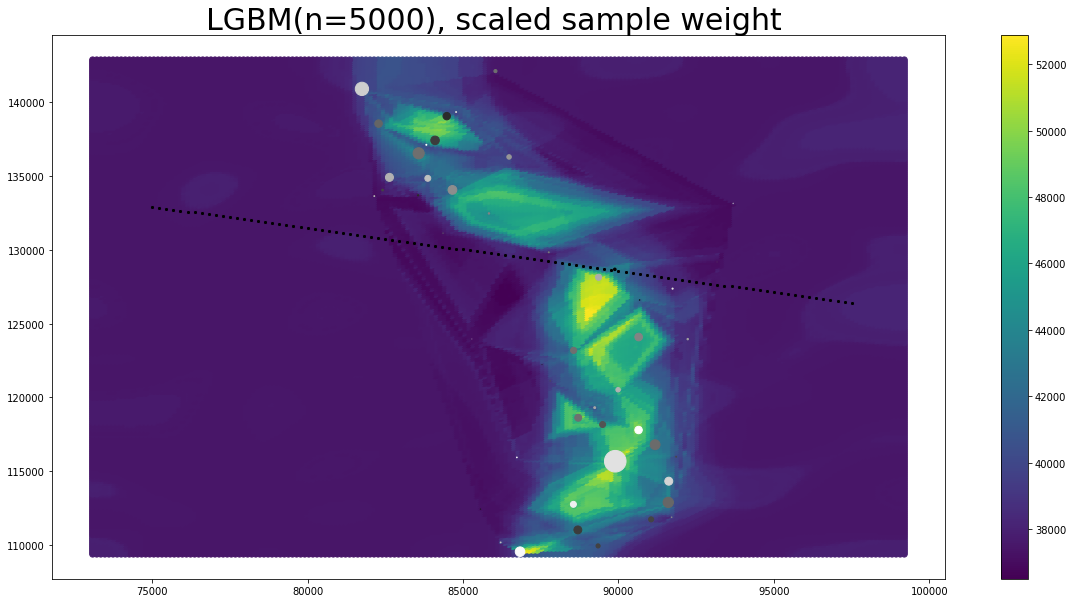

In [59]:
t = np.linspace(75000, 97500, 100)
fault = -.29*t + 154670

plt.figure(figsize=(20,10))
#plt.scatter(sum_interp['Y'], sum_interp['X'], c=sum_interp['PORO(v/v)'], )
plt.scatter(ai['Y'], ai['X'], c=ai['pred'], )
plt.colorbar()
uppers = wells
plt.scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/500, c=uppers['Age'], cmap='gray')

plt.title('LGBM(n=5000), scaled sample weight ', fontsize=30)
plt.scatter(t, fault, s=5, c='black', marker='x', label='faultline')

# validate using existing wells

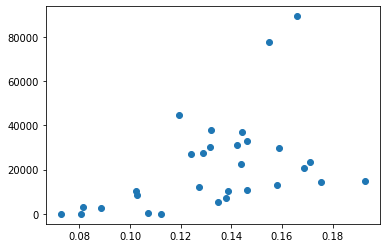

In [ ]:

u = data[data['Completion Zone'] == 0]
np.corrcoef(u['AI_lower(2012-01-01)'], u['sum'])
plt.scatter(u['PORO(v/v)'], u['sum'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b71fecc-b405-4b93-bce3-c5ed6c21c449' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>